In [148]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [149]:
cd 'MyDrive'

[Errno 2] No such file or directory: 'MyDrive'
/content/drive/MyDrive


In [150]:
#number of plant classes
import os
classes_train = [ item for item in os.listdir('Training_set/') if os.path.isdir(os.path.join('Training_set/', item)) ]
print(" Classes in training dataset:", classes_train)
print("No of classes:", len(classes_train))

 Classes in training dataset: ['Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Target_Spot', 'Tomato_Septoria_leaf_spot', 'Tomato_Leaf_Mold', 'Tomato__Tomato_mosaic_virus', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Potato___healthy', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight']


In [151]:
#craete data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)
# load training dataset
batch_size=128
training_iter = datagen.flow_from_directory('Training_set/', 
                                            target_size=(224, 224),
                                            classes = classes_train,
                                            class_mode='categorical', 
                                            batch_size=batch_size)

Found 20441 images belonging to 15 classes.


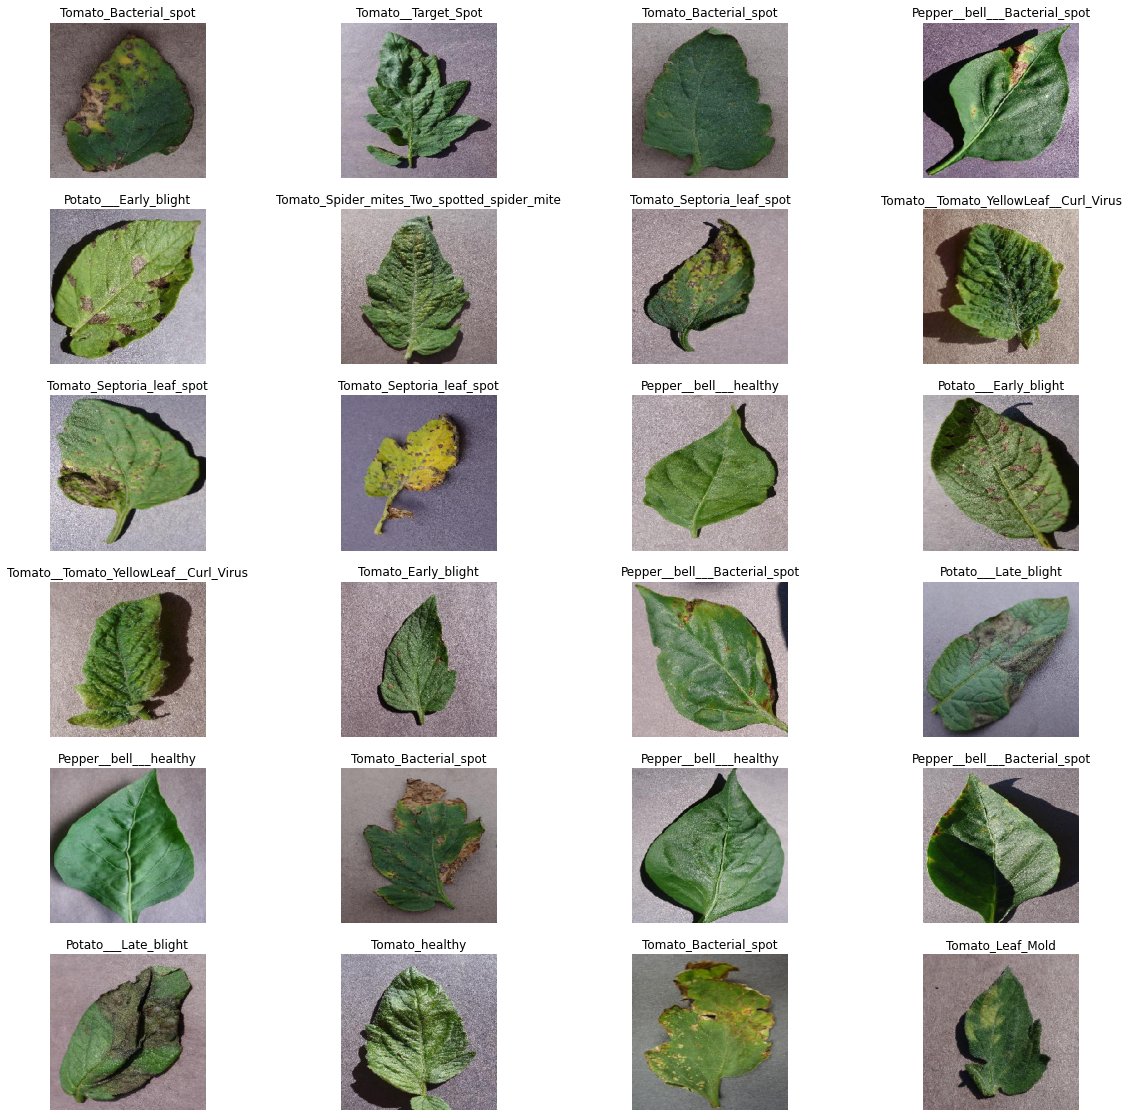

In [152]:
#sample plant images visualization
def show_batch(images,label):
    plt.figure(figsize=(20,20))
    for i in range(24):
        ax=plt.subplot(6,4,i+1)
        plt.imshow(images[i])
        label_index = list(label[i]).index(1)
        plt.title(classes_train[label_index])
        plt.axis('off')
images,label =next(training_iter)
show_batch(images,label)
#sample training plant images

In [153]:
#load validation data
validation_iter = datagen.flow_from_directory('Validation_Set/', 
                                            target_size=(224, 224),
                                            classes = classes_train,
                                            class_mode='categorical', 
                                            batch_size=batch_size)

Found 209 images belonging to 15 classes.


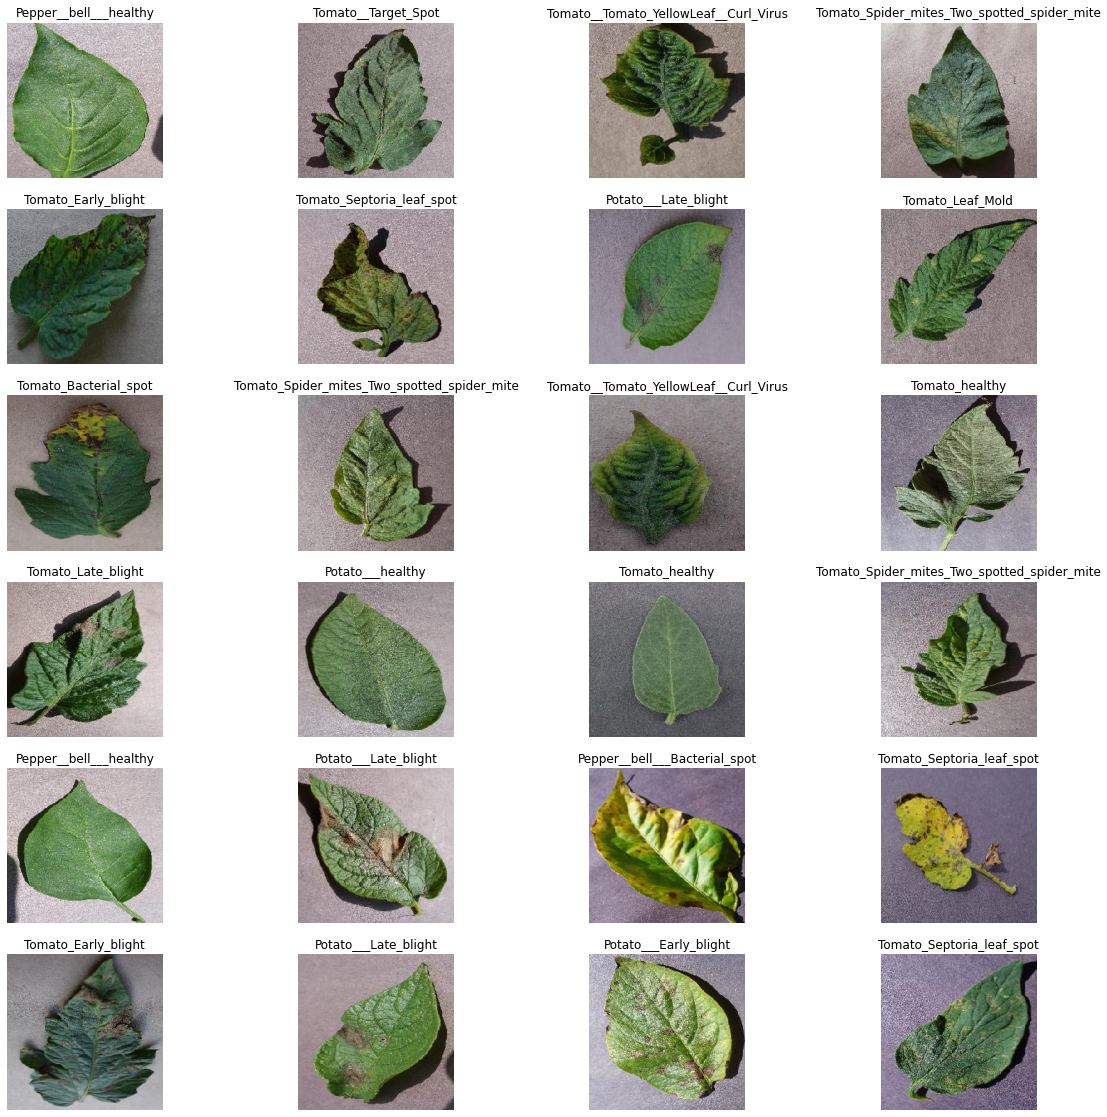

In [154]:
#sample validation plant images
val_images,val_label =next(validation_iter)
show_batch(val_images,val_label)

In [155]:
#model construction
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes_train)))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_16 (Batc (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 109, 109, 32)      128       
_________________________________________________________________
activation_26 (Activation)   (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 54, 54, 32)       

In [156]:
#compile the model
from keras import optimizers
model.compile(loss='categorical_crossentropy',
   optimizer=optimizers.RMSprop(lr=1e-4),
   metrics=['acc'])

In [157]:
#fit the model
hist = model.fit(training_iter, 
                    steps_per_epoch=150,
                    epochs= 16, 
                    validation_data=validation_iter, 
                    validation_steps=2)

Epoch 1/16
150/150 [==============================] - 60s 390ms/step - loss: 2.0535 - acc: 0.3866 - val_loss: 4.5454 - val_acc: 0.0574
Epoch 2/16
150/150 [==============================] - 58s 384ms/step - loss: 1.0497 - acc: 0.6716 - val_loss: 6.0002 - val_acc: 0.0957
Epoch 3/16
150/150 [==============================] - 58s 389ms/step - loss: 0.7984 - acc: 0.7473 - val_loss: 4.7690 - val_acc: 0.1196
Epoch 4/16
150/150 [==============================] - 58s 385ms/step - loss: 0.6457 - acc: 0.7962 - val_loss: 0.9308 - val_acc: 0.7177
Epoch 5/16
150/150 [==============================] - 57s 380ms/step - loss: 0.5694 - acc: 0.8176 - val_loss: 0.5044 - val_acc: 0.8230
Epoch 6/16
150/150 [==============================] - 57s 378ms/step - loss: 0.4923 - acc: 0.8424 - val_loss: 0.5275 - val_acc: 0.7943
Epoch 7/16
150/150 [==============================] - 57s 378ms/step - loss: 0.4391 - acc: 0.8590 - val_loss: 0.4781 - val_acc: 0.8421
Epoch 8/16
150/150 [==============================] - 5

In [ ]:
#hist.history

In [163]:
#find out accuracy,loss on validation dataset
loss,accuracy = model.evaluate(validation_iter, steps=2)
print("Accuracy :" , accuracy*100)
print("Loss :", loss)

2/2 [==============================] - 1s 231ms/step - loss: 0.2806 - acc: 0.9091
Accuracy : 90.90909361839294
Loss : 0.28059813380241394


In [165]:
#serialize model to JSON
model_json = model.to_json()
with open("plant_disease.json", "w") as json_file:
    json_file.write(model_json)

In [166]:
#serialize weights to HDF5
model.save_weights("plant_disease.h5")

In [ ]:
#test data not available